# Coronavirus Global Cases Vizualisations

In [1]:
### import libraries
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings

# Dataset

This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [2]:
warnings.filterwarnings("ignore")

In [3]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
###Check the confirmed df first five rows
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829


In [5]:
### Replace NaN values by 0
confirmed_df.fillna(0, inplace=True)
deaths_df.fillna(0, inplace=True)
recoveries_df.fillna(0, inplace=True)

In [6]:
# Remove columns
confirmed_df = confirmed_df.drop(['Province/State'], axis=1)
deaths_df = deaths_df.drop(['Province/State'], axis=1)
recoveries_df = recoveries_df.drop(['Province/State'], axis=1)

In [7]:
###Index columns as DataFrame series
cols = confirmed_df.keys()

In [8]:
###Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[3]:cols[-1]]
deaths = deaths_df.loc[:, cols[3]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[3]:cols[-1]]

In [9]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
active_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(confirmed_sum-(recovered_sum+death_sum))
    active_cases_sum=(confirmed_sum-(recovered_sum+death_sum)).sum()

In [10]:
###Convert integer into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

In [11]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [12]:
###Future forecast
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

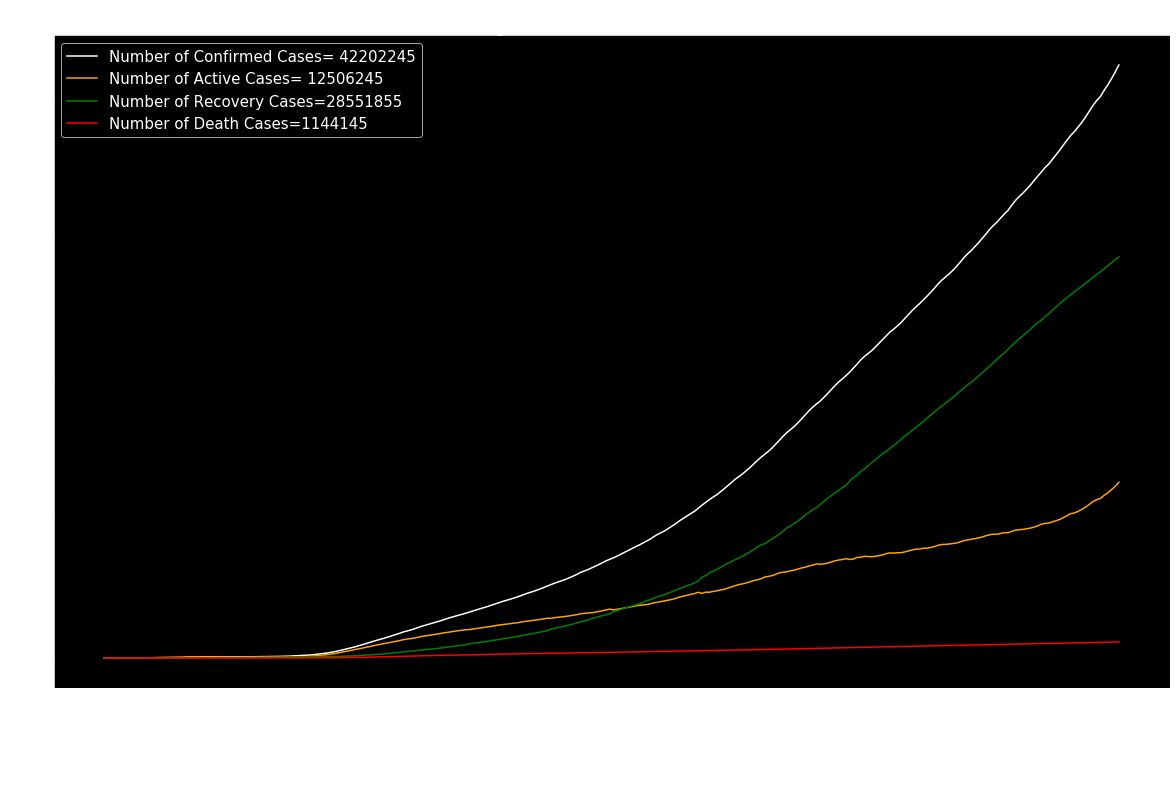

In [13]:
#Coronavirus Active/Confirmed/Recoveries/Deaths Cases Over Time
plt.figure(figsize=(20, 12))
plt.style.use('dark_background')
plt.plot(adjusted_dates, world_cases, color='white')
plt.plot(adjusted_dates, active_cases, color='orange')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Confirmed, Active, Recovery & Death Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Confirmed Cases= '+ str(confirmed_sum), 'Number of Active Cases= '+ str(active_cases_sum), 'Number of Recovery Cases='+ str(recovered_sum), 'Number of Death Cases='+ str(death_sum)], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

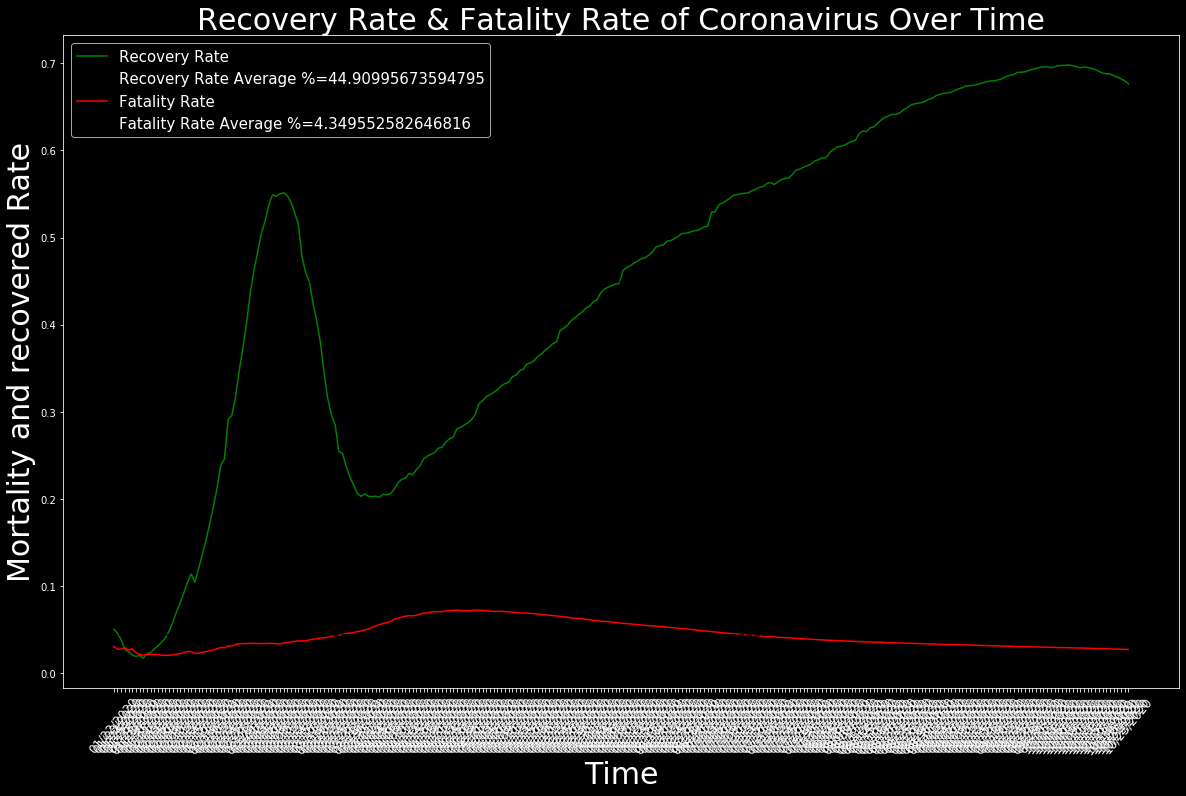

In [14]:
###Coronavirus Recovery & Mortality Rate Over Time
mean_recovery_rate = np.mean(recovery_rate)
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, recovery_rate, color='green')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.plot(adjusted_dates, mortality_rate, color='red')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Recovery Rate & Fatality Rate of Coronavirus Over Time', size=30)
plt.legend(['Recovery Rate', 'Recovery Rate Average %='+str(mean_recovery_rate*100),'Fatality Rate', 'Fatality Rate Average %='+str(mean_mortality_rate*100)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Mortality and recovered Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

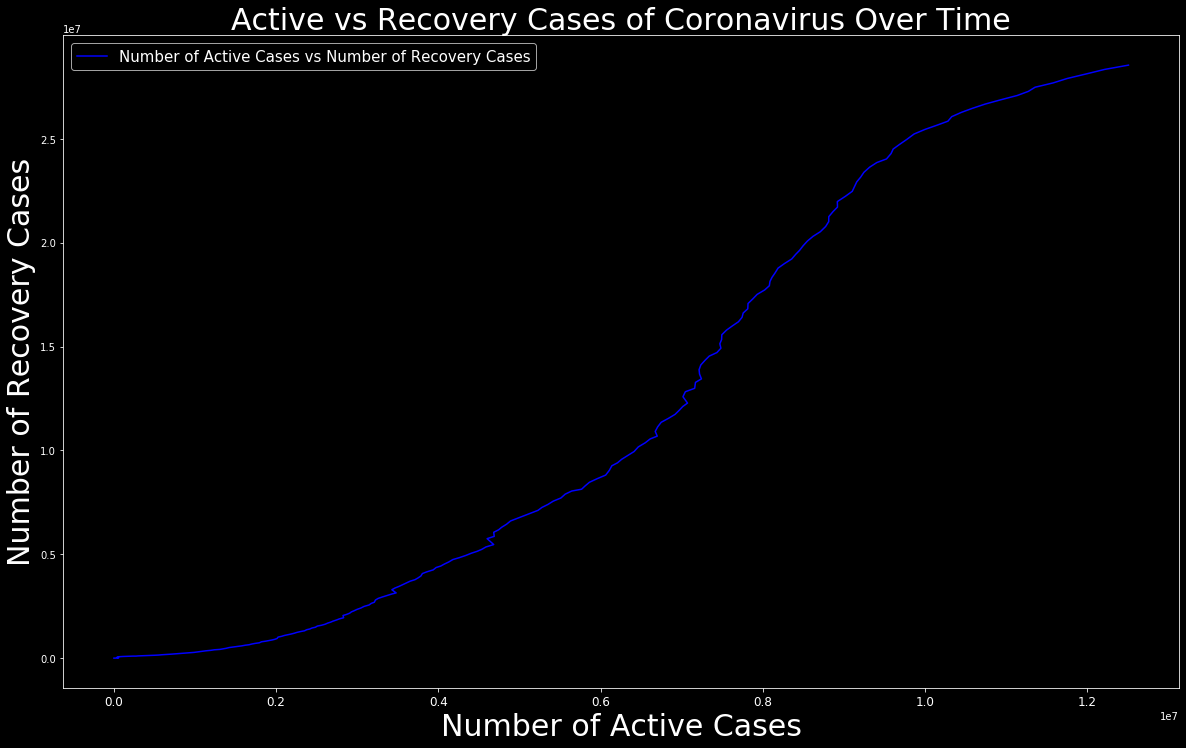

In [15]:
##Active vs recovered Cases Cases
plt.figure(figsize=(20, 12))
plt.plot(active_cases, total_recovered, color='blue')
plt.title('Active vs Recovery Cases of Coronavirus Over Time', size=30)
plt.legend(['Number of Active Cases vs Number of Recovery Cases'], loc='upper left', fontsize=15)
plt.xlabel('Number of Active Cases', size=30)
plt.ylabel('Number of Recovery Cases', size=30)
plt.xticks(size=12)
plt.show()